## Observations and Insights 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice.
total_mice = len(merged_data["Mouse ID"].value_counts())

print(f"The total number of mice is {total_mice}.")


The total number of mice is 249.


In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()


In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id = pd.DataFrame(duplicate_mice)
duplicate_mice_id.head()

,0
0,g989


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)==False]

In [19]:
# Checking the number of mice in the clean DataFrame.
mice = len(cleaned_data['Mouse ID'].value_counts())

print(f"The total number of mice in the clean DataFrame is {mice}.")

The total number of mice in the clean DataFrame is 248.


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Calculate the Mean
regimen_mean = cleaned_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
regimen_mean

#Calculate the Median
regimen_median = cleaned_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
regimen_median

#Calculate the Variance
regimen_variance = cleaned_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
regimen_variance

#Calculate the Standard Deviation
regimen_sd = cleaned_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
regimen_sd

#Calculate the SEM
regimen_sem = cleaned_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
regimen_sem

#Create Summary DataFrame
summary_df = pd.DataFrame({'Mean' : regimen_mean,
                          'Median' : regimen_median,
                          'Variance' : regimen_variance,
                          'Standard Deviation' : regimen_sd,
                          'SEM' : regimen_sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
single_summary_df = cleaned_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})

single_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

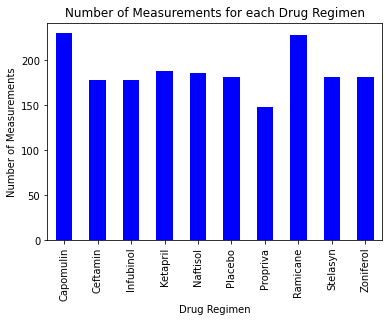

<Figure size 432x288 with 0 Axes>

In [26]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regimen_group = cleaned_data.groupby('Drug Regimen')
number_of_measurements = regimen_group['Mouse ID'].count()

measurements_chart = number_of_measurements.plot(kind='bar', color='b')
measurements_chart.set_xlabel('Drug Regimen')
measurements_chart.set_ylabel('Number of Measurements')
measurements_chart.set_title("Number of Measurements for each Drug Regimen")

plt.show()
plt.tight_layout()


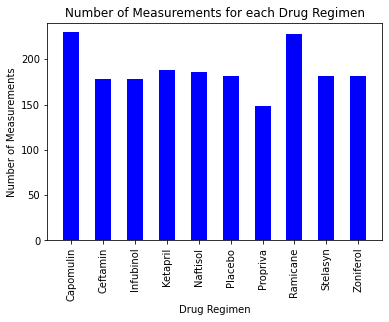

In [67]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

mice_per_drug = (cleaned_data.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()

x_axis = np.arange(len(regimen_group))

plt.bar(x_axis, mice_per_drug, color='b', align='center', width=[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane",
                           "Stelasyn", "Zoniferol"], rotation=90)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_per_drug) +10)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Number of Measurements for each Drug Regimen")

plt.show()


In [68]:
#Get Gender Data for Mice

#Groupby Gender
gender = cleaned_data.groupby(['Mouse ID', 'Sex'])
gender_df = pd.DataFrame(mice_gender.size())

#Get Count of Female & Male Mice
mouse_gender = pd.DataFrame(gender_df.groupby(['Sex']).count())
mouse_gender.columns = ['Total Count']

#Percent of Females and Males
mouse_gender['Percentage of Gender'] = ((mouse_gender['Total Count']/mouse_gender['Total Count'].sum())*100)
mouse_gender['Percentage of Gender'] = mouse_gender['Percentage of Gender']

mouse_gender.head()


,Total Count,Percentage of Gender
Sex,,
Female,123,49.596774
Male,125,50.403226


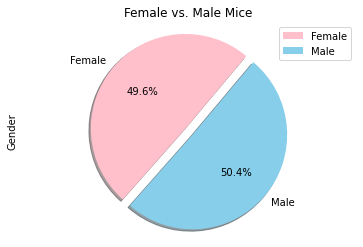

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['pink', 'skyblue']
explode = (0.1, 0)

plot = mouse_gender.plot.pie(y='Total Count', colors = colors, startangle = 50, explode=explode, shadow = True,
                            autopct='%1.1f%%')

plt.title('Female vs. Male Mice')
plt.ylabel('Gender')
plt.axis('equal')

plt.show()

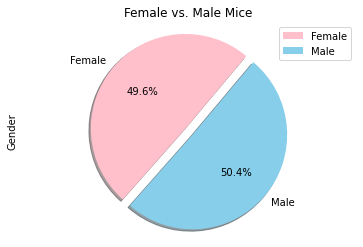

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.596774, 50.403226]
colors = ['pink', 'skyblue']
explode = (0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle = 50)
plt.title("Female vs. Male Mice")
plt.ylabel("Gender")
plt.axis("equal")
plt.legend(loc="upper right")

plt.show()

## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = pd.DataFrame(cleaned_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(
columns={'Timepoint' : 'Last Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_timepoint_df = pd.merge(cleaned_data, last_timepoints, on='Mouse ID')

merged_timepoint_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
